# **Primer Parcial**
Rodriguez Medina Leyla Camila

# Librerias Importadas

In [239]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargado del Dataset

In [240]:
# Cargar y preprocesar el dataset

# Lee el archivo CSV y carga sus datos en un DataFrame de pandas llamado 'dataset'
dataset = pd.read_csv('/content/test.csv')

# Obtén el número total de filas en el DataFrame
num_filas = dataset.shape[0]
# Imprime el número de filas en el DataFrame
print(f"Número de filas: {num_filas}")
dataset.info()

Número de filas: 16626
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Columns: 172 entries, id to species
dtypes: float64(169), int64(1), object(2)
memory usage: 21.8+ MB


# Construcción del Dataset sintético



> np.random.choice: Esta función de NumPy selecciona aleatoriamente elementos de una lista o array. En este caso, se elige un valor de la lista ['norte', 'sur', 'este', 'oeste'].

['norte', 'sur', 'este', 'oeste'] es la lista de opciones posibles, que representa diferentes regiones.



> El parámetro size=len(dataset) indica que se deben hacer tantas selecciones como el número de filas del dataset (es decir, una por cada fila).



dataset['region']: Esta parte del código crea o sobrescribe una columna llamada region en el dataset dataset. A cada fila de esta columna se le asigna uno de los valores aleatorios seleccionados en el paso anterior.





In [241]:
# Agregar atributos con caracteres, texto y booleanos

# Añade una nueva columna 'region' al DataFrame con valores aleatorios que representan regiones ('norte', 'sur', 'este', 'oeste')
dataset['region'] = np.random.choice(['norte', 'sur', 'este', 'oeste'], size=len(dataset))

# Añade una nueva columna 'es_domestico' al DataFrame con valores booleanos aleatorios (True o False)
dataset['es_domestico'] = np.random.choice([True, False], size=len(dataset))

# Añade una nueva columna 'descripcion_color' al DataFrame con frases aleatorias que describen colores
dataset['descripcion_color'] = np.random.choice(
    ['color rojo brillante', 'azul profundo', 'verde esmeralda', 'amarillo brillante'],
    size=len(dataset)
)
display(dataset.head())


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,flammea,sur,True,color rojo brillante
1,1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,flammea,norte,False,verde esmeralda
2,2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,flammea,este,False,verde esmeralda
3,3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,flammea,sur,False,color rojo brillante
4,4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,flammea,sur,False,color rojo brillante


Se asignan X y y de el dataset original

In [242]:
# Crea una nueva variable 'X_original' que contiene todas las columnas del DataFrame, excepto la columna 'species'
X_original = dataset.drop(columns=['species','id'])

# Crea una nueva variable 'y_original' que contiene solo la columna 'species' del DataFrame
y_original = dataset['species']

# Mapeo de etiquetas categóricas a valores numéricos
En resumen, estas líneas convierten las etiquetas de species en valores numéricos, agregan estos valores al DataFrame original y al DataFrame normalizado, y luego muestran las primeras filas del DataFrame para confirmar que la conversión se ha realizado correctamente.

In [243]:
# Asignar valores únicos a las clases de la etiqueta 'species'

# Obtén los valores únicos de la columna 'species' y guárdalos en 'species_unique'
species_unique = dataset['species'].unique()

# Crea un diccionario que mapea cada valor único de 'species' a un índice numérico
species_mapping = {species: idx for idx, species in enumerate(species_unique)}

# Añade una nueva columna 'species_numeric' al DataFrame con los valores numéricos correspondientes a cada clase de 'species'
dataset['species'] = dataset['species'].map(species_mapping)

# Imprime las primeras filas del DataFrame para verificar que las columnas se hayan añadido correctamente
display(dataset.head())


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0,sur,True,color rojo brillante
1,1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0,norte,False,verde esmeralda
2,2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0,este,False,verde esmeralda
3,3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0,sur,False,color rojo brillante
4,4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0,sur,False,color rojo brillante


In [244]:

# Mapeo para la columna 'region'
region_mapping = {'norte': 0, 'sur': 1, 'este': 2, 'oeste': 3}
dataset['region'] = dataset['region'].map(region_mapping)

# Mapeo para la columna 'es_domestico' (True -> 1, False -> 0)
dataset['es_domestico'] = dataset['es_domestico'].astype(int)

# Mapeo para la columna 'descripcion_color'
descripcion_color_unique = dataset['descripcion_color'].unique()
descripcion_color_mapping = {color: idx for idx, color in enumerate(descripcion_color_unique)}
dataset['descripcion_color'] = dataset['descripcion_color'].map(descripcion_color_mapping)

# Verificar que las columnas se hayan añadido correctamente
display(dataset.head())
# Verificar el tipo de datos de todas las columnas del dataset
print(dataset.dtypes)
# Verificar si hay valores nulos en las columnas numéricas
print(dataset.isnull().sum())


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0,1,1,0
1,1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0,0,0,1
2,2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0,2,0,1
3,3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0,1,0,0
4,4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0,1,0,0


id                     int64
chromogram_0_0       float64
chromogram_0_1       float64
chromogram_0_10      float64
chromogram_0_11      float64
                      ...   
spec_centr_9         float64
species                int64
region                 int64
es_domestico           int64
descripcion_color      int64
Length: 175, dtype: object
id                   0
chromogram_0_0       0
chromogram_0_1       0
chromogram_0_10      0
chromogram_0_11      0
                    ..
spec_centr_9         0
species              0
region               0
es_domestico         0
descripcion_color    0
Length: 175, dtype: int64


# Filtrado de las primeras 10 clases
Estas líneas crean un filtro para seleccionar solo las filas correspondientes a las primeras 10 clases en species_numeric y aplican ese filtro al DataFrame normalizado. Posteriormete se imprime la nueva forma del dataset.

In [245]:
# Filtrar el dataset para las primeras 10 clases

# Eliminar la columna 'id' del dataset
dataset = dataset.drop(columns=['id'])

# Define cuántas clases quieres seleccionar (en este caso, las primeras 10)
ten_classes = 10

# Crea una máscara booleana que indica si los valores en la columna 'species_numeric' están entre 0 y 9 (las primeras 10 clases)
mask_ten_classes = np.isin(dataset['species'], np.arange(ten_classes))

# Filtra el DataFrame 'normalized_data' usando la máscara para obtener solo las filas correspondientes a las primeras 10 clases
dataset_ten_classes = dataset[mask_ten_classes]

print(f"La forma del dataset sintético es: {dataset_ten_classes.shape}")
display(dataset_ten_classes.head())


La forma del dataset sintético es: (4377, 174)


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0,1,1,0
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0,0,0,1
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0,2,0,1
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0,1,0,0
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0,1,0,0


# Duplicar los ejemplos con criterios consistentes


1.   Se crea un dataset sintético añadiendo una versión perturbada del dataset original con ruido aleatorio y también incluyen una versión duplicada del dataset original (esta línea está comentada). Finalmente, muestran las dimensiones del nuevo dataset sintético
2.   Primero, se define una función llamada `variation` que aplica una pequeña perturbación aleatoria a los valores de un DataFrame. Esta perturbación se ajusta con un parámetro denominado `variation_factor`, que determina la intensidad de las variaciones. Luego, se utiliza esta función para modificar el DataFrame original (`dataset_ten_classes`), generando un nuevo DataFrame con los datos alterados. Posteriormente, se combinan el DataFrame original y el modificado para crear un dataset sintético que incluye tanto los datos originales como los perturbados. Finalmente, se muestran las primeras filas de este dataset sintético para confirmar que la perturbación se ha aplicado correctamente y que los datos se han combinado como se esperaba.





In [246]:
# Seleccionar solo las columnas numéricas
numeric_columns = dataset_ten_classes.select_dtypes(include=[np.number])

# Verificar si las formas coinciden
print(numeric_columns.shape)

# Definir el factor de perturbación máximo
perturbation_max = 0.1 # Valor máximo de la perturbación

# Crear un dataset sintético duplicando los datos numéricos originales y añadiendo ruido dentro del rango [0, perturbation_max]
synthetic_data = pd.concat([
    numeric_columns,  # Datos originales numéricos
    numeric_columns + np.random.uniform(0, perturbation_max, size=numeric_columns.shape)  # Datos perturbados
], ignore_index=True)



"""
# Definir el factor de perturbación máximo
perturbation_max = 0.0000000000000005  # Valor máximo de la perturbación

# Crear un dataset sintético duplicando los datos originales y añadiendo ruido dentro del rango [0, 0.01]
synthetic_data = pd.concat([
    dataset_ten_classes,  # Datos originales
    dataset_ten_classes + np.random.uniform(0, perturbation_max, size=dataset_ten_classes.shape)  # Datos perturbados
], ignore_index=True)

# Mostrar los primeros registros del dataset sintético para verificar
print(synthetic_data.head())


# Definir la función add_variation
def variation(df, variation_factor=0.1):
    return df * (1 + np.random.normal(0, variation_factor, df.shape))

# Añadir variación a todo el dataset
varied_dataset = variation(dataset_ten_classes)

# Concatenar los datos originales y los perturbados
synthetic_data = pd.concat([
    dataset_ten_classes,  # Datos originales
    varied_dataset  # Datos con perturbaciones aplicadas
], ignore_index=True)
"""
# Mostrar los primeros registros del dataset sintético para verificar
display(synthetic_data.head())
print(synthetic_data.shape)



(4377, 173)


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0.0,1.0,1.0,0.0
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0.0,0.0,0.0,1.0
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0.0,2.0,0.0,1.0
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0.0,1.0,0.0,0.0
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0.0,1.0,0.0,0.0


(8754, 173)


# Verificación los nombres de las columnas y las primeras filas del dataset original filtrado para las primeras 10 clases

In [247]:
from IPython.display import display

# Muestra los nombres de las columnas del dataset original filtrado 'dataset_ten_classes'
print("Columnas del dataset_ten_classes:")
column_names_df = pd.DataFrame(dataset_ten_classes.columns, columns=['Column Names'])
display(column_names_df)

# Muestra las primeras filas del dataset original filtrado para verificar cómo lucen los datos
print("\nPrimeras filas del dataset_ten_classes:")
display(dataset_ten_classes.head())

# Muestra los nombres de las columnas del dataset sintético 'synthetic_data'
print("\nColumnas del synthetic_data:")
column_names_df = pd.DataFrame(synthetic_data.columns, columns=['Column Names'])
display(column_names_df)

# Muestra las primeras filas del dataset sintético para verificar cómo lucen los datos
print("\nPrimeras filas del synthetic_data:")
display(synthetic_data.head())

# Muestra una sección del dataset sintético empezando desde el índice 16626
# Esto te permite revisar los datos en esa parte del dataset
start_index = 4377
print(f"\nDatos del synthetic_data desde que se duplican {start_index}:")
display(synthetic_data.iloc[start_index:])



Columnas del dataset_ten_classes:


,Column Names
0,chromogram_0_0
1,chromogram_0_1
2,chromogram_0_10
3,chromogram_0_11
4,chromogram_0_12
...,...
169,spec_centr_9
170,species
171,region
172,es_domestico



Primeras filas del dataset_ten_classes:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0,1,1,0
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0,0,0,1
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0,2,0,1
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0,1,0,0
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0,1,0,0



Columnas del synthetic_data:


,Column Names
0,chromogram_0_0
1,chromogram_0_1
2,chromogram_0_10
3,chromogram_0_11
4,chromogram_0_12
...,...
168,spec_centr_9
169,species
170,region
171,es_domestico



Primeras filas del synthetic_data:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,0.0,1.0,1.0,0.0
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0.0,0.0,0.0,1.0
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,0.0,2.0,0.0,1.0
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,0.0,1.0,0.0,0.0
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,0.0,1.0,0.0,0.0



Datos del synthetic_data desde que se duplican 4377:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color
4377,1.035006,0.987893,0.774738,0.775481,0.771108,0.341784,0.930347,0.305090,0.564796,0.267483,...,2702.078453,2675.308624,2817.685559,2708.714172,2738.072000,2688.230022,0.064819,1.098023,1.077533,0.062766
4378,0.694382,0.607289,0.760600,1.009209,0.748370,0.568578,1.061570,0.324246,0.362424,0.184825,...,2702.262134,2675.441464,2817.732404,2708.389054,2738.449471,2687.786012,0.017313,0.075137,0.058589,1.013382
4379,1.066551,0.860101,0.831537,0.735881,0.669637,0.370127,0.989937,0.371947,0.571293,0.233002,...,2702.407726,2675.595644,2817.891830,2708.058145,2738.800319,2687.398161,0.075857,2.044032,0.051267,1.064750
4380,1.067902,0.880315,0.797507,0.736883,0.683312,0.357908,0.951043,0.312621,0.575153,0.204070,...,2702.582994,2675.693419,2817.922048,2707.713292,2739.095660,2686.961063,0.026535,1.027910,0.096193,0.038988
4381,1.028076,0.884926,0.855016,0.779626,0.715005,0.397095,1.005689,0.341395,0.580321,0.251554,...,2702.809205,2675.850885,2818.000404,2707.401508,2739.473584,2686.465977,0.051123,1.008373,0.069732,0.043540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,0.382927,1.079802,0.798575,0.570978,0.392687,1.058518,0.569839,0.521820,1.064344,0.616922,...,2708.697126,2650.247793,2676.168877,2737.804052,2556.018279,2616.907886,1.088688,2.086461,1.058133,1.090671
8750,0.435531,1.083736,0.812199,0.594908,0.420602,1.006173,0.620073,0.516233,1.019347,0.593131,...,2708.642683,2650.403225,2676.240679,2737.640284,2555.785334,2617.465824,1.026670,3.048596,0.081988,2.093335
8751,0.390867,1.031069,0.803868,0.636097,0.483397,1.013343,0.634773,0.517249,1.015849,0.616293,...,2708.630731,2650.562110,2676.283064,2737.487022,2555.485964,2618.126546,1.080882,1.013781,0.084190,2.090514
8752,0.375234,1.005227,0.830713,1.059134,0.851331,0.933208,1.084207,1.001217,0.965258,0.552489,...,2708.575191,2650.717591,2676.376111,2737.348799,2555.142971,2618.721580,1.079780,2.025444,1.047265,3.003558


Asignar características y etiquetas al dataset sintético: Esto implica separar el dataset sintético (synthetic_data) en dos partes: características y etiquetas.



> Se excluye la columna species_numeric e id para obtener las características (X_synthetic).


> La columna species_numeric se asigna como las etiquetas (y_synthetic).





In [248]:
from IPython.display import display

# Asignar características y etiquetas al dataset sintético

# Excluye la columna 'species' y 'id' para obtener las características del dataset sintético
X_synthetic = synthetic_data.drop(columns=['species'])

# Asigna la columna 'species' como las etiquetas del dataset sintético
y_synthetic = synthetic_data['species']

# Muestra las primeras filas del dataset original para revisar las características y etiquetas originales
print("Dataset Original:")
display(X_original.head())  # Muestra las primeras filas de las características del dataset original
display(y_original.head())  # Muestra las primeras filas de las etiquetas del dataset original

# Muestra las primeras filas del dataset sintético para revisar las características y etiquetas sintéticas
print("\nDataset Sintético:")
display(X_synthetic.head())  # Muestra las primeras filas de las características del dataset sintético
display(y_synthetic.head())  # Muestra las primeras filas de las etiquetas del dataset sintético


Dataset Original:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2611.073052,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,sur,True,color rojo brillante
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2610.927073,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,norte,False,verde esmeralda
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2610.782378,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,este,False,verde esmeralda
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2610.638981,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,sur,False,color rojo brillante
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2610.496832,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,sur,False,color rojo brillante


,species
0,flammea
1,flammea
2,flammea
3,flammea
4,flammea



Dataset Sintético:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,region,es_domestico,descripcion_color
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2611.073052,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,1.0,1.0,0.0
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2610.927073,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,0.0,0.0,1.0
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2610.782378,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,2.0,0.0,1.0
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2610.638981,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,1.0,0.0,0.0
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2610.496832,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,1.0,0.0,0.0


,species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Crear gráficas representativas de los datos

La gráfica compara la distribución de la característica chromogram_0_0 en el dataset original y en el dataset sintético. Se presentan dos histogramas lado a lado en una sola figura: el gráfico de la izquierda muestra la distribución de chromogram_0_0 en el dataset original, mientras que el gráfico de la derecha muestra la distribución de la misma característica en el dataset sintético

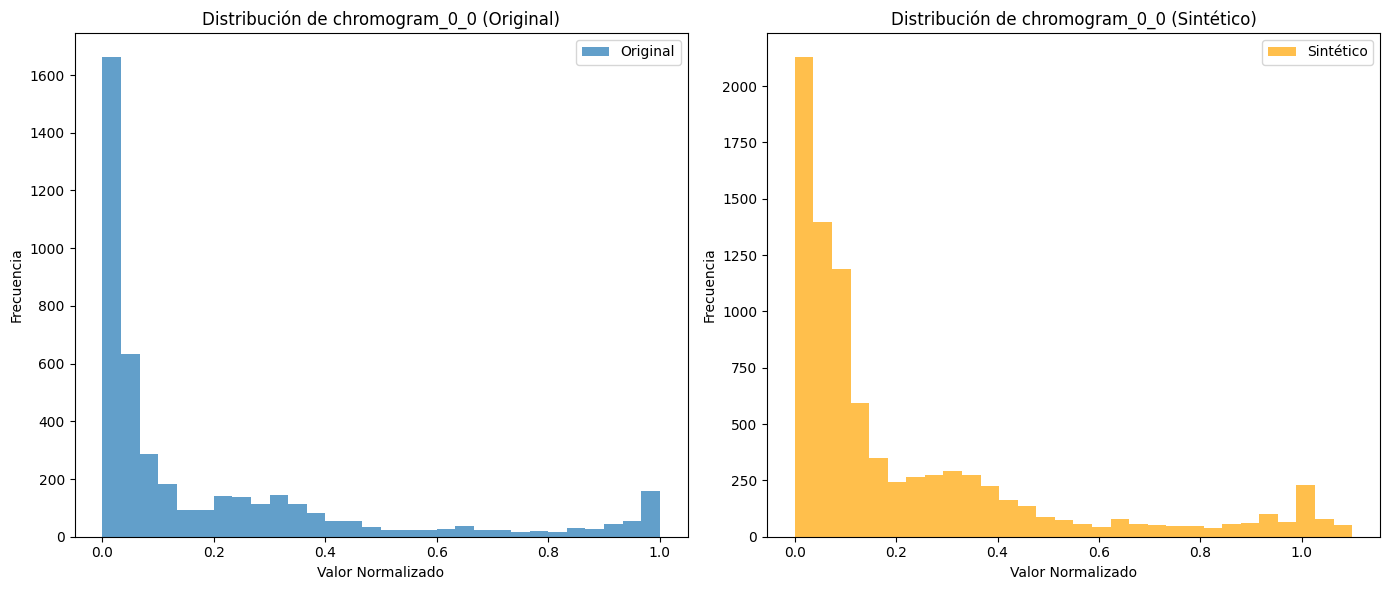

In [249]:
# Crear gráficos representativos del dataset original y sintético

# Configura el tamaño de la figura para los gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Distribución de 'chromogram_0_0' en el dataset original
plt.subplot(1, 2, 1)
plt.hist(dataset_ten_classes['chromogram_0_0'], bins=30, alpha=0.7, label='Original')
plt.title('Distribución de chromogram_0_0 (Original)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

# Segundo gráfico: Distribución de 'chromogram_0_0' en el dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_data['chromogram_0_0'], bins=30, alpha=0.7, color='orange', label='Sintético')
plt.title('Distribución de chromogram_0_0 (Sintético)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

# Ajusta el diseño de los gráficos para que no se sobrepongan
plt.tight_layout()

# Muestra los gráficos
plt.show()


Se crea una figura con dos gráficos de dispersión para comparar dos características ('chromogram_0_0' y 'chromogram_0_1') entre un dataset original y un dataset sintético.


> Primero, se filtra el dataset sintético para mostrar solo la segunda mitad de los datos. Luego, se generan dos subgráficos: el primero muestra la distribución de las características en el dataset original, mientras que el segundo muestra la distribución en el dataset sintético filtrado.




> Ambos gráficos están coloreados según la variable species_numeric, y se configuran con títulos, leyendas, y etiquetas de ejes. Finalmente, se ajusta el diseño de la figura y se muestran los gráficos para facilitar la comparación visual.



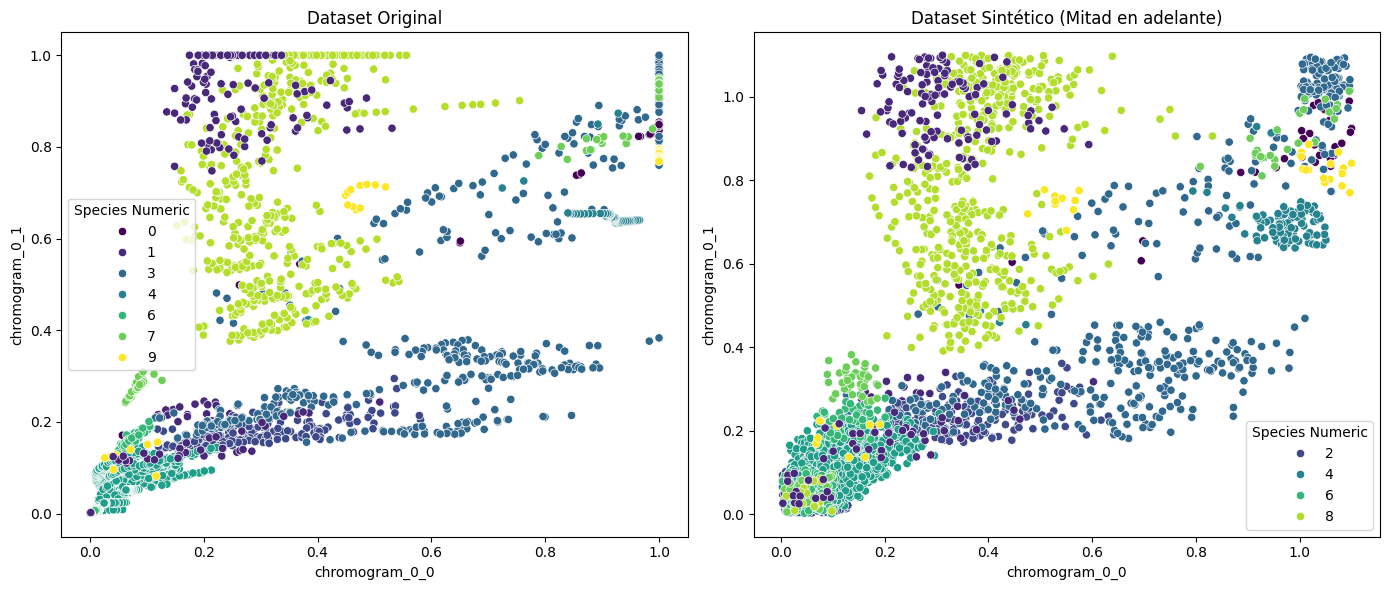

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las primeras dos características para graficar
features_to_plot = ['chromogram_0_0', 'chromogram_0_1']

# Filtrar el dataset sintético para mostrar solo la segunda mitad
mid_index = len(synthetic_data) // 2
synthetic_data_filtered = synthetic_data.iloc[mid_index:]

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico del dataset original
sns.scatterplot(data=dataset_ten_classes, x=features_to_plot[0], y=features_to_plot[1], hue='species', palette='viridis', ax=axes[0])
axes[0].set_title('Dataset Original')
axes[0].legend(title='Species Numeric')
axes[0].set_xlabel(features_to_plot[0])
axes[0].set_ylabel(features_to_plot[1])

# Gráfico del dataset sintético (filtrado con perturbaciones)
sns.scatterplot(data=synthetic_data_filtered, x=features_to_plot[0], y=features_to_plot[1], hue='species', palette='viridis', ax=axes[1])
axes[1].set_title('Dataset Sintético (Mitad en adelante)')
axes[1].legend(title='Species Numeric')
axes[1].set_xlabel(features_to_plot[0])
axes[1].set_ylabel(features_to_plot[1])

plt.tight_layout()
plt.show()


# Dividir el dataset en datos de entrenamiento y prueba

Se realiza una división manual del dataset en conjuntos de entrenamiento y prueba, y preparan los datos para el entrenamiento de un modelo.


>  Primero, la función split_train_test divide las características (X) y las etiquetas (y) en conjuntos de entrenamiento y prueba con un 80% para entrenamiento y un 20% para prueba.



---

```
# X_train = X[idx[:-test_size]] y y_train = y[idx[:-test_size]] seleccionan las filas para el conjunto de entrenamiento usando todos los índices excepto los últimos test_size.

X_test = X[idx[-test_size:]] y y_test = y[idx[-test_size:]] seleccionan las filas para el conjunto de prueba usando los últimos test_size índices.
```






In [251]:
# División manual del dataset en entrenamiento y prueba (80% - 20%)
def split_train_test(X, y, test_size=0.2):
    # Obtiene el número total de ejemplos en el dataset
    m = len(X)

    # Crea un array de índices que corresponden a cada ejemplo en el dataset
    idx = np.arange(m)

    # Baraja aleatoriamente los índices para asegurar una división aleatoria
    np.random.shuffle(idx)

    # Calcula el tamaño del conjunto de prueba basado en el porcentaje especificado
    test_size = int(m * test_size)

    # Divide los datos en conjuntos de entrenamiento y prueba
    # Usa los primeros 'm - test_size' índices para el conjunto de entrenamiento
    # Usa los últimos 'test_size' índices para el conjunto de prueba
    X_train = X[idx[:-test_size]]
    y_train = y[idx[:-test_size]]
    X_test = X[idx[-test_size:]]
    y_test = y[idx[-test_size:]]

    # Retorna los conjuntos de entrenamiento y prueba
    return X_train, X_test, y_train, y_test



> Asigna valores a X y y y aplica la división



In [252]:
# Separa las características (X) y las etiquetas (y) del dataset sintético, excluyendo la columna 'id' o la primera columna (índice 0)
X = synthetic_data.drop(['species',], axis=1).values  # Elimina las columnas 'species' e 'id' y convierte el resto en un array de numpy
y = synthetic_data['species'].values  # Extrae la columna 'species' como las etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba usando la función definida previamente
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2)

print("Dimensiones de X_train_bias:", X_train.shape)
print("Dimensiones de X_test_bias:", X_test.shape)

Dimensiones de X_train_bias: (7004, 172)
Dimensiones de X_test_bias: (1750, 172)


>  Luego, se agrega una columna de unos a las matrices de características de entrenamiento y prueba (X_train_bias y X_test_bias) para incluir un término de intercepción en el modelo.


In [253]:
# Agregar una columna de unos para el término de intercepción

# Agregar una columna de unos para el término de intercepción
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Asegúrate de que esto se hace correctamente
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]    # Asegúrate de que esto se hace correctamente

print("Forma de X_train_bias:", X_train_bias.shape)
print("Número de ejemplos en X_train_bias:", X_train_bias.shape[0])
print("Número de ejemplos en y_train:", y_train.shape[0])


Forma de X_train_bias: (7004, 173)
Número de ejemplos en X_train_bias: 7004
Número de ejemplos en y_train: 7004


# Normalización

In [254]:
# Normalizar los datos

def featureNormalize(X):
    X_norm = X.copy()
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)

    # Normalizar los datos
    X_norm = (X - min_vals) / (max_vals - min_vals)

    return X_norm, min_vals, max_vals

In [255]:
# llama featureNormalize con los datos cargados
X_train, mu, sigma = featureNormalize(X)
X_test, mu, sigma = featureNormalize(X)

# Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.


- **`sigmoid(z)`**:
  - **Tipo**: Función Sigmoidea.
  - **Uso**: Convierte valores a un rango entre 0 y 1, útil para probabilidades en clasificación binaria.

- **`compute_cost(theta, X, y, lambda_=1)`**:
  - **Tipo**: Binary Cross-Entropy Loss (con regularización L2).
  - **Uso**: Calcula el costo del modelo y el gradiente, mide el error entre las predicciones y las etiquetas reales.
  - **Regularización**: L2 (Ridge).
    - **Descripción**: Penaliza los valores grandes de los parámetros para evitar el sobreajuste. Añade un término al costo que es la suma de los cuadrados de los parámetros, excluyendo el término de interceptación.

- **`gradient_descent(X, y, theta, alpha, num_iters, lambda_)`**:
  - **Tipo**: Algoritmo de Optimización.
  - **Uso**: Ajusta los parámetros del modelo para minimizar la función de costo mediante descenso de gradiente.

In [256]:
#  Definir las funciones para la regresión logística usando numpy

import numpy as np

# Definir la función sigmoid
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Evitar overflow en los valores extremos
    return 1 / (1 + np.exp(-z))

# Función para calcular el costo
def compute_cost(theta, X, y, lambda_=1):
    m = y.size  # número de ejemplos
    epsilon = 1e-15  # Valor pequeño para evitar log(0)

    # Si las etiquetas son booleanas, convertirlas a enteros
    if y.dtype == bool:
        y = y.astype(int)

    # Inicializar el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Hipótesis de la regresión logística
    h = sigmoid(X.dot(theta.T))

    # Asegurarse de que h no sea 0 o 1
    h = np.clip(h, epsilon, 1 - epsilon)

    # Excluir el parámetro theta[0] para regularización (no regularizamos el término de intercepción)
    temp = theta.copy()
    temp[0] = 0

    # Función de costo regularizada
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

# Función para el descenso de gradiente
def gradient_descent(X, y, theta, alpha, num_iters, lambda_):
    m = y.size  # número de ejemplos
    theta = theta.copy()
    J_history = []  # Lista para almacenar los valores del costo

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J, grad = compute_cost(theta, X, y, lambda_)  # Calcular el costo y el gradiente
        J_history.append(J)  # Agregar el costo a la lista J_history

    return theta, J_history  # Devolver theta y la lista J_history

"""
def compute_cost(X, y, theta, lambda_):
    m = len(y)  # Número de ejemplos
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * (np.sum(errors**2) + lambda_ * np.sum(theta[1:]**2))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)  # Número de ejemplos
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors) + (lambda_/m) * theta
        theta -= alpha * gradient

        # Guardar el valor de la función de costo
        J_history[i] = compute_cost(X, y, theta, lambda_)

    return theta, J_history
"""


'\ndef compute_cost(X, y, theta, lambda_):\n    m = len(y)  # Número de ejemplos\n    predictions = X.dot(theta)\n    errors = predictions - y\n    cost = (1/(2*m)) * (np.sum(errors**2) + lambda_ * np.sum(theta[1:]**2))\n    return cost\n\ndef gradient_descent(X, y, theta, alpha, num_iters, lambda_):\n    m = len(y)  # Número de ejemplos\n    J_history = np.zeros(num_iters)\n\n    for i in range(num_iters):\n        predictions = X.dot(theta)\n        errors = predictions - y\n        gradient = (1/m) * X.T.dot(errors) + (lambda_/m) * theta\n        theta -= alpha * gradient\n\n        # Guardar el valor de la función de costo\n        J_history[i] = compute_cost(X, y, theta, lambda_)\n\n    return theta, J_history\n'



>  El proceso de entrenar los pesos del modelo se lleva a cabo dentro de la función de gradiente descendente. Esta función utiliza el dataset de entrenamiento para ajustar los parámetros del modelo en función de la tasa de aprendizaje y el número de iteraciones, optimizando el costo y mejorando el modelo.



# Función de Entrenamiento OvA
Para cada clase, convierte las etiquetas en binarias, entrena un clasificador usando descenso de gradiente, y guarda los parámetros y el historial del costo. Finalmente, devuelve todos los parámetros y el historial del costo para cada clase.

In [257]:
# Entrenar un modelo One-vs-All con las 10 clases
def train_one_vs_all(X, y, num_classes, alpha, num_iters, lambda_=1):
    m, n = X.shape  # Obtiene el número de ejemplos (m) y el número de características (n)
    all_theta = np.zeros((num_classes, n))  # Inicializa un array para los parámetros de cada clase
    all_J_history = []  # Inicializa una lista para almacenar el historial del costo

    # Entrena un clasificador para cada clase
    for c in range(num_classes):
        print(f"Entrenando clase {c}...")  # Imprime el progreso del entrenamiento para la clase actual
        initial_theta = np.zeros(n)  # Inicializa los parámetros para la clase actual
        y_c = (y == c).astype(int)  # Convierte las etiquetas en binarias para la clase c
        theta, J_history = gradient_descent(X, y_c, initial_theta, alpha, num_iters, lambda_)  # Entrena el clasificador usando descenso de gradiente
        all_theta[c] = theta  # Almacena los parámetros entrenados para la clase c
        all_J_history.append(J_history)  # Guarda el historial del costo para la clase c

    return all_theta, all_J_history  # Devuelve los parámetros y el historial del costo para todas las clases




> Aquí se definen los hiperparámetros y se entrena un modelo de clasificación usando el enfoque One-vs-All.



In [258]:
# Definimos hiperparámetros
theta = np.zeros(X.shape[1])
alpha = 1        # Tasa de aprendizaje (learning rate): Controla el tamaño de los pasos que da el algoritmo para actualizar los pesos en cada iteración
num_iters = 500    # Número de iteraciones: Indica cuántas veces se actualarán los pesos del modelo durante el entrenamiento
lambda_ = 0.01     # Parámetro de regularización: Evita el sobreajuste penalizando los pesos grandes y mejorando la generalización del modelo
num_classes = 10   # Número de clases: Define cuántas clases hay en el problema de clasificación. En este caso, tenemos 10 clases diferentes

# Entrenamos el modelo

# all_theta almacena los parámetros (pesos) aprendidos para cada clase
# all_J_history almacena el valor de la función de costo (J) en cada iteración para monitorear la convergencia del entrenamiento
all_theta, all_J_history = train_one_vs_all(X_train_bias, y_train, num_classes, alpha, num_iters, lambda_)

Entrenando clase 0...
Entrenando clase 1...
Entrenando clase 2...
Entrenando clase 3...
Entrenando clase 4...
Entrenando clase 5...
Entrenando clase 6...
Entrenando clase 7...
Entrenando clase 8...
Entrenando clase 9...


# Visualización la evolución del costo para todas las clases


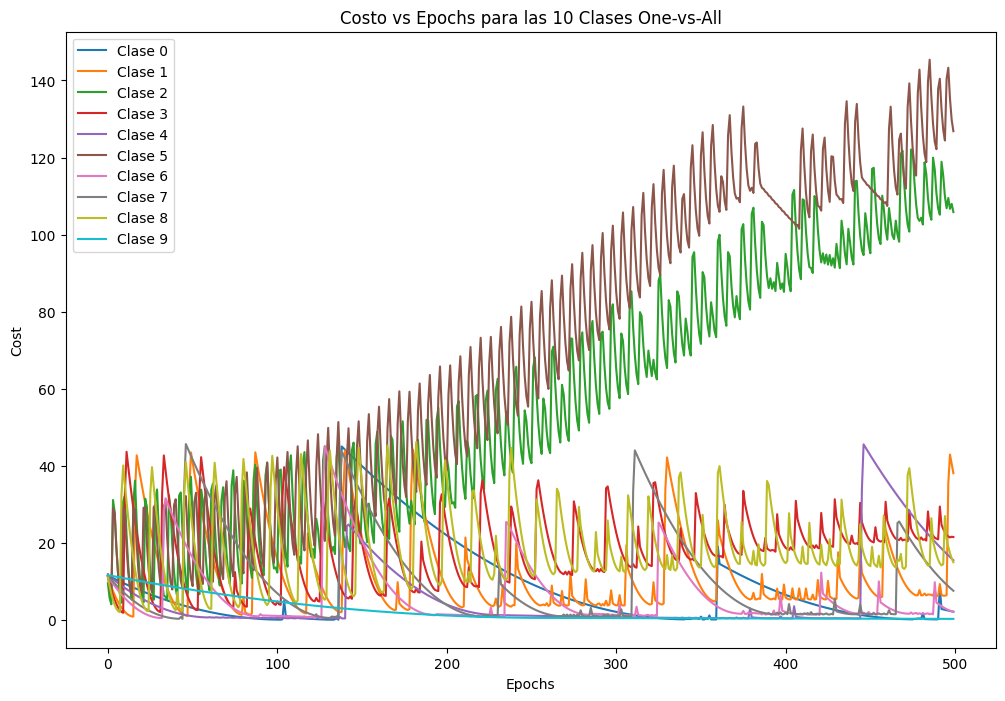

In [259]:

# Crear una figura de tamaño 12x8 para los gráficos
plt.figure(figsize=(12, 8))

# Recorrer cada clase y graficar la evolución del costo (J) durante las iteraciones
for i in range(num_classes):
    plt.plot(all_J_history[i], label=f'Clase {i}')  # Graficar la función de costo para la clase 'i'

# Etiquetas de los ejes
plt.xlabel('Epochs')  # Eje X muestra el número de iteraciones (o epocas)
plt.ylabel('Cost')    # Eje Y muestra el valor del costo

# Título del gráfico
plt.title('Costo vs Epochs para las 10 Clases One-vs-All')

# Mostrar la leyenda con las etiquetas de las clases
plt.legend()

# Mostrar el gráfico
plt.show()


# Implementación One Vs All

In [260]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    epsilon = 1e-5  # Para evitar log(0)

    # Hipótesis
    h = sigmoid(X.dot(theta))

    # Evitar log(0)
    h = np.clip(h, epsilon, 1 - epsilon)

    # Regularización
    temp = theta.copy()
    temp[0] = 0  # No regularizar el término de sesgo

    # Función de costo
    J2 = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Gradiente
    grad2 = (1 / m) * (h - y).dot(X)
    grad2 = grad2 + (lambda_ / m) * temp

    return J2, grad2

In [261]:
def gradient_descent2(X, y, initial_theta, lambda_, alpha, num_iters):
    theta2 = initial_theta.copy()
    m = y.size
    for i in range(int(num_iters)):  # Aseguramos que num_iters sea un entero
        J, grad = lrCostFunction(theta2, X, y, lambda_)
        theta2 = theta2 - alpha * grad
    return theta2


In [262]:
def oneVsAll(X, y, num_labels, lambda_, alpha, num_iter):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    m, n = X.shape
    all_theta2 = np.zeros((num_labels, n + 1))  # Aquí (num_labels, n + 1)

    # Agregamos una columna de unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)

        # Creamos las etiquetas binarias para la clase actual (c)
        y_c = (y == c).astype(int)

        # Usamos gradiente descendente para optimizar theta para la clase actual
        theta = gradient_descent2(X, y_c, initial_theta, lambda_, alpha, num_iters)

        # Guardamos los theta optimizados
        all_theta2[c, :] = theta

    return all_theta2

In [263]:
lambda_ = 0.1
num_labels = num_classes
alpha=0.01
num_iters = 500

all_theta2 = oneVsAll(X_train_bias, y_train, num_labels, lambda_, alpha, num_iters)
print(all_theta2.shape)

(10, 174)


# Definición de la Función de Predicción:


> predict_one_vs_all(X, all_theta): Define una función que toma las características X y los parámetros del modelo all_theta para predecir las clases.

> Añadir blockquoteDentro de la función, se calcula la probabilidad de cada clase para todas las muestras usando la función sigmoidea. La multiplicación matricial X @ all_theta.T genera un puntaje para cada clase, y np.argmax selecciona la clase con el puntaje más alto para cada muestra.




In [264]:
# Hacer predicciones

# Función para predecir las clases usando el modelo One-vs-All
def predict_one_vs_all(X, all_theta):
    # Calcula la probabilidad de cada clase para todas las muestras usando la función sigmoid
    # X @ all_theta.T es la multiplicación matricial entre las características X y los parámetros del modelo (transpuestos)
    # np.argmax selecciona el índice de la clase con la mayor probabilidad

    m = X.shape[0]
    num_labels = all_theta.shape[0]

    # Verifica las formas de X y all_theta
    print("Forma de X en predict_one_vs_all:", X.shape)
    print("Forma de all_theta en predict_one_vs_all:", all_theta.shape)

    # Calcula la probabilidad usando la función sigmoide
    probabilities = sigmoid(X @ all_theta.T)

    # Selecciona la clase con la mayor probabilidad
    p = np.argmax(probabilities, axis=1)
    return p


# Generación de Predicciones:


> y_pred_train = predict_one_vs_all(X_train_bias, all_theta): Usa la función para hacer predicciones sobre el conjunto de entrenamiento.


> y_pred_test = predict_one_vs_all(X_test_bias, all_theta): Usa la función para hacer predicciones sobre el conjunto de prueba.





In [265]:
num_labels = 10  # Número de clases
n = X_train.shape[1]  # Número de características originales
all_theta = np.zeros((num_labels, n + 1))  # +1 para el término de sesgo
# Predicciones para el conjunto de entrenamiento

y_pred_train = predict_one_vs_all(X_train_bias, all_theta)
# Predicciones para el conjunto de prueba
y_pred_test = predict_one_vs_all(X_test_bias, all_theta)
print("Forma de y_pred_train:", y_pred_train.shape)
print("Forma de y_train:", y_train.shape)

print("Número de ejemplos en X_train_bias:", X_train_bias.shape[0])
print("Número de ejemplos en y_train:", y_train.shape[0])


Forma de X en predict_one_vs_all: (7004, 173)
Forma de all_theta en predict_one_vs_all: (10, 173)
Forma de X en predict_one_vs_all: (1750, 173)
Forma de all_theta en predict_one_vs_all: (10, 173)
Forma de y_pred_train: (7004,)
Forma de y_train: (7004,)
Número de ejemplos en X_train_bias: 7004
Número de ejemplos en y_train: 7004




> Visualizar cómo cambia el costo a lo largo del entrenamiento para cada clase en el modelo One-vs-All.



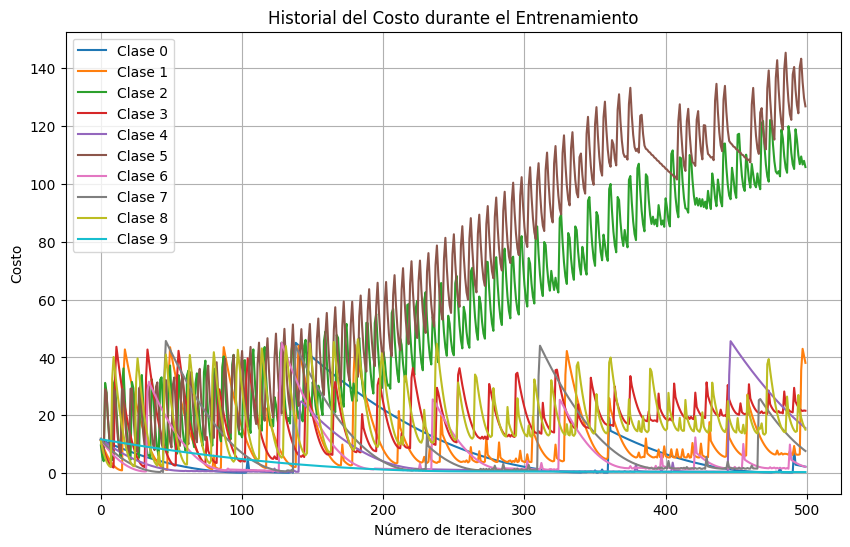

In [266]:
# Graficar el historial de costos
plt.figure(figsize=(10, 6))

# Iterar sobre cada clase para graficar el costo en función de las iteraciones
for c in range(num_classes):
    plt.plot(range(num_iters), all_J_history[c], label=f'Clase {c}')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Historial del Costo durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Evalución de la precisión del modelo
Mide y muestra cuán bien el modelo clasifica correctamente las muestras en ambos conjuntos de datos.

In [274]:
import numpy as np

# Supongamos que ya tienes X_train, X_test, y_train, y_test definidos y cargados

# Ajusta las dimensiones para que sean consistentes
print("Forma de X_train:", X_train.shape)  # (8754, 172)
print("Forma de X_test:", X_test.shape)    # (8754, 172)
print("Forma de y_train:", y_train.shape)  # (7004,)
print("Forma de y_test:", y_test.shape)    # (1750,)

# Asegúrate de que X_train y y_train tengan el mismo número de ejemplos
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError(f"El número de ejemplos en X_train ({X_train.shape[0]}) no coincide con el número de ejemplos en y_train ({y_train.shape[0]})")

# Asegúrate de que X_test y y_test tengan el mismo número de ejemplos
if X_test.shape[0] != y_test.shape[0]:
    raise ValueError(f"El número de ejemplos en X_test ({X_test.shape[0]}) no coincide con el número de ejemplos en y_test ({y_test.shape[0]})")

# Agrega la columna de unos para X_train y X_test
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Agrega la columna de unos
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]    # Agrega la columna de unos

# Verifica las formas de X_train_bias y X_test_bias
print("Forma de X_train_bias:", X_train_bias.shape)  # (7004, 173)
print("Forma de X_test_bias:", X_test_bias.shape)    # (1750, 173)

# Define el número de etiquetas y el theta inicial
num_labels = 10  # Define el número de etiquetas/clases
initial_theta = np.zeros(X_train_bias.shape[1])  # Asegúrate de que la dimensión sea correcta

# Entrena el modelo
all_theta2 = oneVsAll(X_train_bias, y_train, num_labels, lambda_, alpha, num_iters)

# Verifica la forma de all_theta2 después del entrenamiento
print("Forma de all_theta2 después del entrenamiento:", all_theta2.shape)

# Si all_theta2 tiene más columnas de las esperadas, recorta el número de columnas en all_theta2
if all_theta2.shape[1] > X_train_bias.shape[1]:
    all_theta2 = all_theta2[:, :X_train_bias.shape[1]]  # Recorta all_theta2 para que coincida con X_train_bias

# Verifica las formas después del ajuste
print("Forma de all_theta2 después del ajuste:", all_theta2.shape)

# Realiza predicciones
y_pred_train = predict_one_vs_all(X_train_bias, all_theta2)
y_pred_test = predict_one_vs_all(X_test_bias, all_theta2)

# Verifica las formas y el contenido de las variables
print("Forma de y_pred_train:", y_pred_train.shape)  # (7004,)
print("Forma de y_pred_test:", y_pred_test.shape)    # (1750,)
print("Primeros 10 valores de y_pred_train:", y_pred_train[:10])
print("Primeros 10 valores de y_train:", y_train[:10])

# Calcula la precisión
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}%')


Forma de X_train: (7004, 172)
Forma de X_test: (1750, 172)
Forma de y_train: (7004,)
Forma de y_test: (1750,)
Forma de X_train_bias: (7004, 173)
Forma de X_test_bias: (1750, 173)
Forma de all_theta2 después del entrenamiento: (10, 174)
Forma de all_theta2 después del ajuste: (10, 173)
Forma de X en predict_one_vs_all: (7004, 173)
Forma de all_theta en predict_one_vs_all: (10, 173)
Forma de X en predict_one_vs_all: (1750, 173)
Forma de all_theta en predict_one_vs_all: (10, 173)
Forma de y_pred_train: (7004,)
Forma de y_pred_test: (1750,)
Primeros 10 valores de y_pred_train: [5 5 5 5 5 5 5 5 5 5]
Primeros 10 valores de y_train: [5.03603411 5.03030213 2.00084394 8.07202311 5.04030224 3.0091252
 1.         3.         5.08660348 0.09438331]
Precisión en el conjunto de entrenamiento: 19.45%
Precisión en el conjunto de prueba: 19.94%


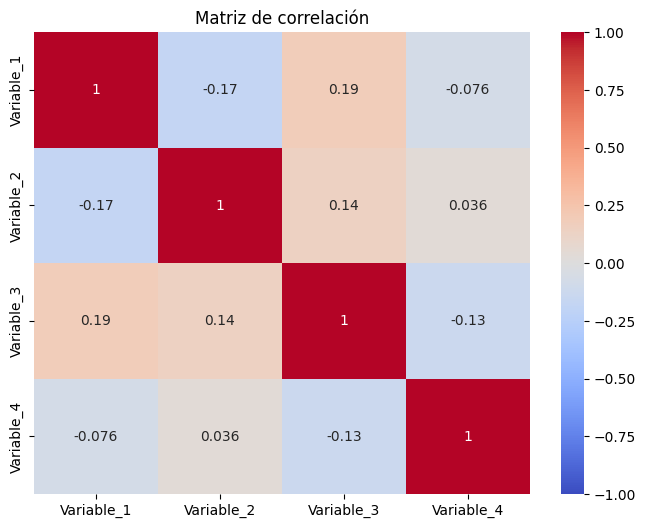

In [275]:
# Ejemplo: Crear un DataFrame de ejemplo (si ya tienes uno, omite esto)
data = {
    'Variable_1': np.random.rand(100),
    'Variable_2': np.random.rand(100),
    'Variable_3': np.random.rand(100),
    'Variable_4': np.random.rand(100)
}

df = pd.DataFrame(data)

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Genera el gráfico de correlación (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Título y muestra el gráfico
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Inicializa contadores para aciertos en el conjunto de entrenamiento y prueba
train_correct = 0
test_correct = 0

# Imprime los resultados de las predicciones y los compara con los reales para el conjunto de entrenamiento
print("Conjunto de entrenamiento:")
for i in range(len(y_pred_train)):
    pred = y_pred_train[i]
    real = y_train[i]
    print(f"Predicción: {pred}, Real: {real}")

    # Verifica si la predicción fue correcta
    if pred == real:
        train_correct += 1

# Calcula la consistencia en el conjunto de entrenamiento
train_accuracy = (train_correct / len(y_pred_train)) * 100
print(f"\nAciertos en el conjunto de entrenamiento: {train_correct}/{len(y_pred_train)}")
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}%")

# Imprime los resultados de las predicciones y los compara con los reales para el conjunto de prueba
print("\nConjunto de prueba:")
for i in range(len(y_pred_test)):
    pred = y_pred_test[i]
    real = y_test[i]
    print(f"Predicción: {pred}, Real: {real}")

    # Verifica si la predicción fue correcta
    if pred == real:
        test_correct += 1

# Calcula la consistencia en el conjunto de prueba
test_accuracy = (test_correct / len(y_pred_test)) * 100
print(f"\nAciertos en el conjunto de prueba: {test_correct}/{len(y_pred_test)}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}%")

Se han truncado las últimas 5000 líneas del flujo de salida.
Predicción: 5, Real: 5.0
Predicción: 5, Real: 5.0
Predicción: 5, Real: 5.0
Predicción: 5, Real: 1.0
Predicción: 5, Real: 5.064413748947634
Predicción: 5, Real: 8.0
Predicción: 5, Real: 5.0
Predicción: 5, Real: 8.012221566127565
Predicción: 5, Real: 1.0
Predicción: 5, Real: 3.0
Predicción: 5, Real: 3.0
Predicción: 5, Real: 3.033164729737698
Predicción: 5, Real: 5.0
Predicción: 5, Real: 5.0351278556364205
Predicción: 5, Real: 5.026196159253597
Predicción: 5, Real: 5.07432651793892
Predicción: 5, Real: 5.062619719493276
Predicción: 5, Real: 5.091128875822461
Predicción: 5, Real: 2.0
Predicción: 5, Real: 5.0435416702385245
Predicción: 5, Real: 5.0
Predicción: 5, Real: 6.0
Predicción: 5, Real: 2.0
Predicción: 5, Real: 5.0
Predicción: 5, Real: 3.0
Predicción: 5, Real: 7.0
Predicción: 5, Real: 2.0
Predicción: 5, Real: 3.0141782407325506
Predicción: 5, Real: 3.0
Predicción: 5, Real: 2.0
Predicción: 5, Real: 5.076387682718374
Predicci